# 3-Factor Personality Survey

In [1]:
from FictionalDataGenerator import MakeData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_theme(style="whitegrid")

In [2]:
# Create a personality survey with 3 factors
maker = MakeData(n_subjects=1100, seed=42)

In [3]:
# Add three personality factors
maker.add_factor(
    name="extraversion",
    n_items=5,
    distribution="normal",
    mean=3.0,
    std=1.2
).add_factor(
    name="agreeableness",
    n_items=5,
    distribution="normal",
    mean=3.5,
    std=0.9
).add_factor(
    name="conscientiousness",
    n_items=5,
    distribution="normal",
    mean=3.8,
    std=1.0
)

In [4]:
# Generate the data
df = maker.run()

In [5]:
# Compute correlation between items
item_cols = [col for col in df.columns if '_' in col]
corr_matrix = df[item_cols].corr()

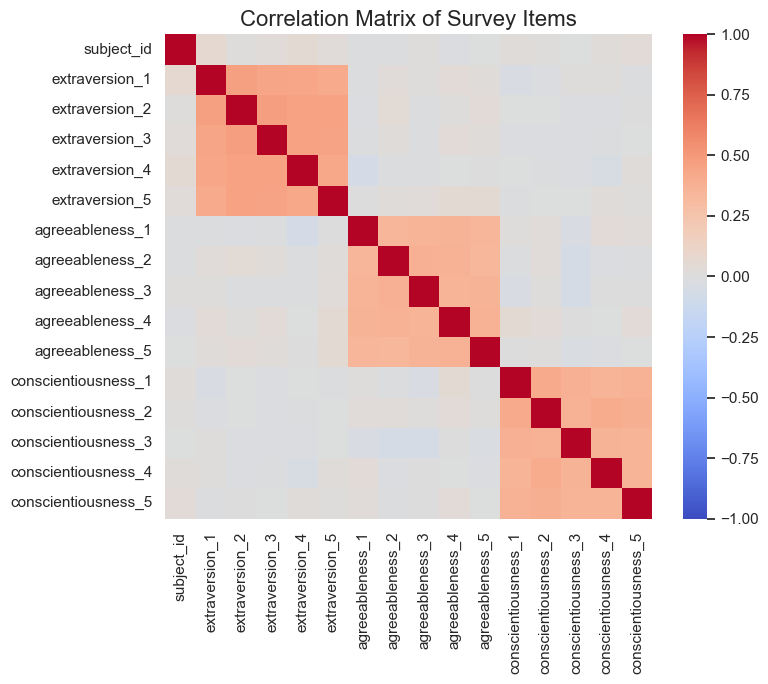

In [8]:
# Visualize correlation matrix using Seaborn
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Survey Items', fontsize=16)
plt.tight_layout()

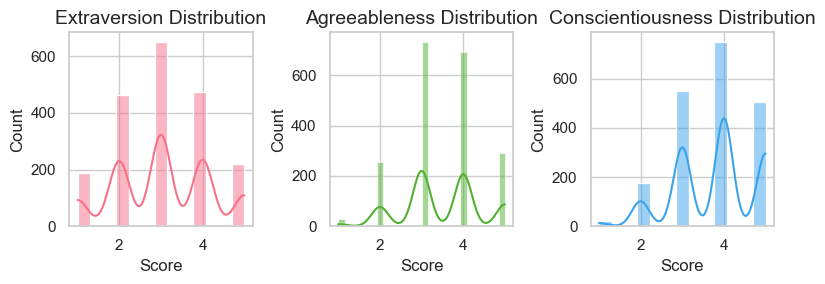

In [11]:
# Visualize the distribution of factor values
plt.figure(figsize=(8, 3))
factor_cols = ['extraversion', 'agreeableness', 'conscientiousness']
for i, factor in enumerate(factor_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[factor], kde=True, color=sns.color_palette("husl", 3)[i-1])
    plt.title(f'{factor.capitalize()} Distribution', fontsize=14)
    plt.xlabel('Score', fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
df

,subject_id,extraversion,extraversion_1,extraversion_2,extraversion_3,extraversion_4,extraversion_5,agreeableness,agreeableness_1,agreeableness_2,agreeableness_3,agreeableness_4,agreeableness_5,conscientiousness,conscientiousness_1,conscientiousness_2,conscientiousness_3,conscientiousness_4,conscientiousness_5
0,1,4.0,5.0,5.0,2.0,5.0,3.0,4.0,4.0,5.0,2.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,3.0
1,2,3.0,4.0,3.0,3.0,4.0,2.0,4.0,5.0,4.0,4.0,5.0,3.0,3.0,2.0,3.0,3.0,2.0,4.0
2,3,4.0,5.0,4.0,2.0,3.0,4.0,3.0,1.0,3.0,5.0,3.0,3.0,3.0,1.0,4.0,5.0,2.0,1.0
3,4,5.0,5.0,5.0,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0
4,5,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,3.0,2.0,3.0,5.0,3.0,4.0,3.0,4.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,4.0,5.0,5.0,5.0,2.0,2.0,4.0,3.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
1996,1997,3.0,4.0,4.0,2.0,4.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,4.0
1997,1998,2.0,3.0,2.0,2.0,1.0,1.0,4.0,4.0,5.0,3.0,2.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0
1998,1999,3.0,2.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0


In [13]:
df.to_csv('Ex3FactorPersonality.csv', index=False)